In [114]:
import datetime
import pandas as pd

df = pd.read_csv('datasets/first_tier_data_set.csv')
df['start_time'] = pd.to_datetime(df['start_time'])
df['end_time'] = pd.to_datetime(df['end_time'])

df_new = pd.DataFrame()

df_new['weekday'] = df.start_time.dt.weekday
df_new['hour'] = df.start_time.dt.hour
df_new['minute'] = df.start_time.dt.minute
df_new['duration'] = (df.end_time.round('15min') - df.start_time.round('15min')).dt.total_seconds() / 60 / 60
df_new['start_time'] = df.start_time
df_new['end_time'] = df.end_time
df_new['device_id'] = df.device_id
df_new['kWh_charged'] = df.kWh_charged
df_new.sort_values(by=['start_time'], inplace=True)

df_new['last1_kWh_charged'] = df_new.groupby('device_id')['kWh_charged'].shift(1)
df_new['last2_kWh_charged'] = df_new.groupby('device_id')['kWh_charged'].shift(2)
df_new['last3_kWh_charged'] = df_new.groupby('device_id')['kWh_charged'].shift(3)
df_new['last7_kWh_charged'] = df_new.groupby('device_id')['kWh_charged'].shift(7)
df_new['last14_kWh_charged'] = df_new.groupby('device_id')['kWh_charged'].shift(14)
# df_new['abstand_last_ladezyklus'] = df_new['start_time'] - df_new.groupby('device_id')['end_time'].shift(1)

In [91]:
df_new.tail(10)
df_new['abstand_last_ladezyklus']

508                NaT
132                NaT
511                NaT
78     0 days 06:40:56
412    0 days 07:45:16
            ...       
192    0 days 00:07:40
393    2 days 05:55:44
262   10 days 11:16:44
424    1 days 06:30:36
144    1 days 09:05:25
Name: abstand_last_ladezyklus, Length: 530, dtype: timedelta64[ns]

In [116]:
from sklearn.preprocessing import OneHotEncoder
import pandas as pd
from sklearn.preprocessing import StandardScaler
def preprocess(df):

    df_preprocessed = pd.DataFrame()

    # weekday onehotencoding
    # Assuming you have a DataFrame called 'df' with a column named 'weekday'
    weekday_column = df['weekday'].values.reshape(-1, 1)  # Reshape the column to a 2D array

    # Create an instance of the OneHotEncoder
    encoder_weekday = OneHotEncoder(sparse=False)

    # Fit and transform the weekday column
    onehot_encoded = encoder_weekday.fit_transform(weekday_column)

    # Create a new DataFrame with the one-hot encoded weekday column
    onehot_df = pd.DataFrame(onehot_encoded, columns=encoder_weekday.get_feature_names_out(['weekday']))

    # Concatenate the new DataFrame with the original DataFrame
    df_preprocessed = pd.concat([df_preprocessed, onehot_df], axis=1)
    

    # hour z-normalization
    df_preprocessed['hour'] = StandardScaler().fit_transform(df['hour'].values.reshape(-1, 1))
    

    # minute z-normalization
    df_preprocessed['minute'] = StandardScaler().fit_transform(df['minute'].values.reshape(-1, 1))

    # duration z-normalization
    df_preprocessed['duration'] = StandardScaler().fit_transform(df['duration'].values.reshape(-1, 1))

    # kWh_charged z-normalization
    scaler_kWh_charged = StandardScaler()
    df_preprocessed['kWh_charged'] = scaler_kWh_charged.fit_transform(df['kWh_charged'].values.reshape(-1, 1))

    # last1_kWh_charged z-normalization
    df_preprocessed['last1_kWh_charged'] = StandardScaler().fit_transform(df['last1_kWh_charged'].values.reshape(-1, 1))

    # last2_kWh_charged z-normalization
    df_preprocessed['last2_kWh_charged'] = StandardScaler().fit_transform(df['last2_kWh_charged'].values.reshape(-1, 1))

    # last3_kWh_charged z-normalization
    df_preprocessed['last3_kWh_charged'] = StandardScaler().fit_transform(df['last3_kWh_charged'].values.reshape(-1, 1))

    # last3_kWh_charged z-normalization
    df_preprocessed['last7_kWh_charged'] = StandardScaler().fit_transform(df['last3_kWh_charged'].values.reshape(-1, 1))

    # last3_kWh_charged z-normalization
    df_preprocessed['last14_kWh_charged'] = StandardScaler().fit_transform(df['last3_kWh_charged'].values.reshape(-1, 1))


    # abstand_last_ladezyklus z-normalization
    # df_preprocessed['abstand_last_ladezyklus'] = StandardScaler().fit_transform(df['abstand_last_ladezyklus'].values.reshape(-1, 1))

    return df_preprocessed.dropna(), scaler_kWh_charged

In [117]:
df_preprocessed, kwh_scaler = preprocess(df_new)
#
df_preprocessed.tail(10)

,weekday_0,weekday_1,weekday_2,weekday_3,weekday_4,weekday_5,weekday_6,hour,minute,duration,kWh_charged,last1_kWh_charged,last2_kWh_charged,last3_kWh_charged,last7_kWh_charged,last14_kWh_charged
520,0.0,0.0,0.0,0.0,0.0,0.0,1.0,-1.479465,0.073659,-0.799874,-0.530493,-1.144835,-0.580661,-0.721113,-0.721113,-0.721113
521,0.0,0.0,0.0,0.0,0.0,0.0,1.0,-1.205010,0.662483,-0.648436,1.125382,-0.640889,0.039537,-0.854439,-0.854439,-0.854439
522,0.0,0.0,0.0,0.0,0.0,0.0,1.0,-1.205010,0.721366,0.752371,-1.190389,0.483382,0.412076,1.426060,1.426060,1.426060
523,0.0,0.0,0.0,0.0,0.0,0.0,1.0,-0.381647,1.192425,-0.932383,-1.137436,-0.526748,-1.147352,-0.582436,-0.582436,-0.582436
524,0.0,0.0,0.0,0.0,0.0,0.0,1.0,-0.107193,-1.575050,-0.932383,-1.151667,-1.136796,-0.530603,-1.147674,-1.147674,-1.147674
525,0.0,0.0,0.0,0.0,0.0,0.0,1.0,-0.107193,-1.103990,-0.534857,-0.491055,-1.151100,-1.139331,-0.532506,-0.532506,-0.532506
526,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.716171,-0.456283,0.506283,-0.385945,-0.058541,-0.225262,0.115918,0.115918,0.115918
527,1.0,0.0,0.0,0.0,0.0,0.0,0.0,-3.675101,-0.750696,-0.213050,1.816927,-0.719388,1.128606,-0.447268,-0.447268,-0.447268
528,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.716171,-0.986225,0.335915,2.876798,-1.190020,0.477341,0.407756,0.407756,0.407756
529,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.265080,0.956895,-0.061611,0.200237,1.137597,-0.644497,0.036172,0.036172,0.036172


Fitting 3 folds for each of 100 candidates, totalling 300 fits
{'subsample': 1.0, 'reg_lambda': 5, 'reg_alpha': 0.1, 'n_estimators': 200, 'min_child_weight': 1, 'max_depth': 3, 'learning_rate': 0.01, 'gamma': 0.1, 'colsample_bytree': 0.8}
Mean Squared Error: 157.5505074252233
Mean Absolute Error: 9.455465591709205


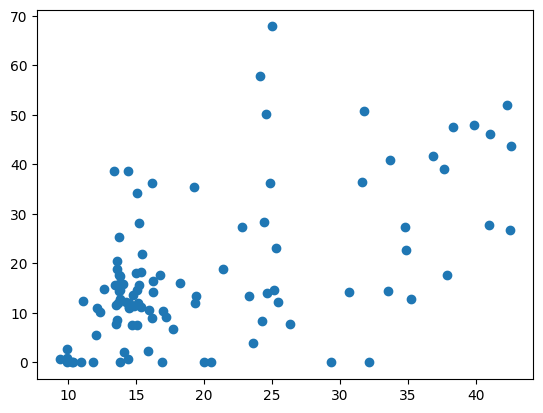

In [127]:
# Step 1: Split the data into features (X) and target (y) variables
X = df_preprocessed.drop('kWh_charged', axis=1)
y = df_preprocessed['kWh_charged']

# Step 2: Split the data into training and testing sets
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=False)

# Step 3: Import the necessary libraries
import xgboost as xgb
from sklearn.linear_model import LinearRegression, SGDRegressor
from sklearn.model_selection import RandomizedSearchCV
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error
import pandas as pd
from sklearn.preprocessing import StandardScaler

# Step 4: Create an instance of the XGBRegressor model
model = xgb.XGBRegressor()
# model = xgb.XGBRegressor(objective='reg:squarederror')
# model = SGDRegressor()
# model = LinearRegression()
# model = RandomForestRegressor()

param_distributions = {
    'learning_rate': [0.01, 0.1, 0.5],
    'n_estimators': [100, 200, 500],
    'max_depth': [3, 5, 7],
    'min_child_weight': [1, 3, 5],
    'subsample': [0.6, 0.8, 1.0],
    'colsample_bytree': [0.6, 0.8, 1.0],
    'gamma': [0, 0.1, 0.5],
    'reg_lambda': [0, 1, 5],
    'reg_alpha': [0, 0.1, 1]
}

model = RandomizedSearchCV(model, param_distributions=param_distributions, n_iter=100, cv=3, verbose=2, random_state=42, n_jobs=-1)

# Step 5: Fit the model to the training data
model.fit(X_train, y_train)

print(model.best_params_)

model = xgb.XGBRegressor(**model.best_params_)
model.fit(X_train, y_train)

# Step 6: Make predictions on the testing data
y_pred = model.predict(X_test)

# Assuming `X` is your DataFrame and `kwh_scaler` is your StandardScaler object
# Unnormalize the `last1_kWh_charged` column
y_pred = kwh_scaler.inverse_transform(y_pred.reshape(-1, 1))
y_test = kwh_scaler.inverse_transform(y_test.values.reshape(-1, 1))

# Step 7: Evaluate the model's performance
mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error:", mse)

mae = mean_absolute_error(y_test, y_pred)
print("Mean Absolute Error:", mae)

import matplotlib.pyplot as plt
plt.scatter(y_pred, y_test, label='Actual')

plt.show()

In [77]:
print(f"y: {y_test[:10]}\n")
print(f"y_test: {y_test[:10]}\n")
print(f"y_pred: {y_pred[:10]}\n")
print(f"y_test.shape: {y_test.shape}")

y: [[29.25237878]
 [27.06432617]
 [ 1.22408044]
 [53.52085944]
 [72.67436883]
 [ 0.87270944]
 [12.08553234]
 [ 2.77443761]
 [ 0.8837451 ]
 [24.28372456]]

y_test: [[29.25237878]
 [27.06432617]
 [ 1.22408044]
 [53.52085944]
 [72.67436883]
 [ 0.87270944]
 [12.08553234]
 [ 2.77443761]
 [ 0.8837451 ]
 [24.28372456]]

y_pred: [[50.868427 ]
 [14.083278 ]
 [ 7.714549 ]
 [33.903065 ]
 [35.222515 ]
 [ 4.50609  ]
 [11.324747 ]
 [ 2.9198253]
 [ 1.8490169]
 [10.384185 ]]

y_test.shape: (106, 1)
